In [ ]:
# Import libraries
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# 1. Download YTD data for Ford (F)
ticker = "F"
data = yf.download(ticker, start=f"{pd.Timestamp.today().year}-01-01", group_by="ticker",auto_adjust=False)

# 2. Handle new multi-index format
if isinstance(data.columns, pd.MultiIndex):
    # Flatten columns
    data.columns = [col[1] for col in data.columns]
data = data.dropna(subset=["Close"])  # ensure clean

data

In [ ]:
# 4. Plot RSI with Overbought/Oversold lines
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["RSI"], label="RSI", color="purple", linewidth=1.5)

# Add reference lines
plt.axhline(70, color="red", linestyle="--", linewidth=1, label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", linewidth=1, label="Oversold (30)")

# Optional: shaded regions
plt.fill_between(data.index, 70, 100, color="red", alpha=0.1)
plt.fill_between(data.index, 0, 30, color="green", alpha=0.1)

plt.title("RSI - Ford (F)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend(loc="upper left")
plt.grid(True)
plt.ylim(0, 100)
plt.show()



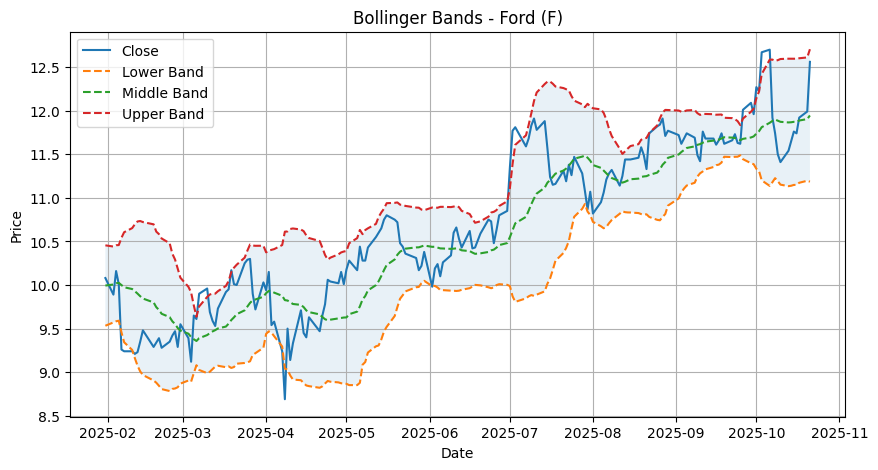

In [18]:
import numpy as np

# --- Bollinger Bands: compute and plot robustly ---
bbands = ta.bbands(close=data["Close"].astype(float), length=20, std=2)

if bbands is None or bbands.empty:
    raise ValueError("Bollinger Bands could not be computed. Check input series and pandas_ta version.")

# (1) Select exactly one column for each band from bbands itself (not from `data`)
lower_s  = bbands.filter(like="BBL").iloc[:, 0]
middle_s = bbands.filter(like="BBM").iloc[:, 0]
upper_s  = bbands.filter(like="BBU").iloc[:, 0]

# (2) Ensure they're 1-D float arrays (no multi-dim dtypes sneaking in)
x        = bbands.index
lower    = np.asarray(lower_s, dtype="float64").ravel()
middle   = np.asarray(middle_s, dtype="float64").ravel()
upper    = np.asarray(upper_s, dtype="float64").ravel()
close    = np.asarray(data["Close"].reindex(x).astype(float), dtype="float64").ravel()  # align to bbands index

# (3) Optional: mask out NaNs (common at the start of the series)
mask = ~np.isnan(lower) & ~np.isnan(upper) & ~np.isnan(close)
x_m, lower_m, upper_m, middle_m, close_m = x[mask], lower[mask], upper[mask], middle[mask], close[mask]

# (4) Plot
plt.figure(figsize=(10, 5))
plt.plot(x_m, close_m, label="Close")
plt.plot(x_m, lower_m, label="Lower Band", linestyle="--")
plt.plot(x_m, middle_m, label="Middle Band", linestyle="--")
plt.plot(x_m, upper_m, label="Upper Band", linestyle="--")
plt.fill_between(x_m, lower_m, upper_m, alpha=0.1)
plt.title("Bollinger Bands - Ford (F)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
